<font size="+3"><b>Assignment 3: Non-Linear Models and Validation Metrics</b></font>

***
* **Full Name** = Nathan Ante   
* **UCID** = 30157706
***

<font color='Blue'>
In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.
</font>

|                **Question**                | **Point** |
|:------------------------------------------:|:---------:|
|           **Part 1: Regression**           |  **14.5** |
|          Step 0: Import Libraries          |           |
|             Step 1: Data Input             |    0.5    |
|           Step 2: Data Processing          |     0     |
| Step 3: Implement   Machine Learning Model |    0.5    |
|           Step 4: Validate Model           |    0.5    |
|         Step 5: Visualize   Results        |     3     |
|                  Questions                 |     6     |
|             Process Description            |     4     |
|         **Part 2: Classification**         |  **17.5** |
|             Step 1: Data Input             |     2     |
|           Step 2: Data Processing          |    1.5    |
| Step 3: Implement   Machine Learning Model |           |
|            Step 4: Validate Mode           |           |
|         Step 5: Visualize   Results        |     4     |
|                  Questions                 |     6     |
|             Process Description            |     4     |
|   **Part 3: Observations/Interpretation**  |   **3**   |
|           **Part 4: Reflection**           |   **2**   |
|                  **Total**                 |   **37**  |
|                                            |           |
|                  **Bonus**                 |           |
|         **Part 5: Bonus Question**         |   **3**   |

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Macante\AppData\Local\Temp\ipykernel_20920\265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# **Part 1: Regression (14.5 marks)**

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

## **Step 1:** Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library:
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [2]:
# TO DO: Import concrete dataset from yellowbrick library
from yellowbrick.datasets import load_concrete
X, y = load_concrete()

## **Step 2:** Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

<font color='red'>
This is just for your information and no action is required from you for this step.
</font>

## **Step 3:** Implement Machine Learning Model (0.5 marks)

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

## **Step 4:** Validate Model (0.5 marks)

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

## **Step 5:** Visualize Results (3 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [3]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

# Imports
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_validate

# Split the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Regression Models
dtr = DecisionTreeRegressor(max_depth=5, random_state=0)
rfr = RandomForestRegressor(max_depth=5, random_state=0)
gbr = GradientBoostingRegressor(max_depth=5, random_state=0)

# List of models to iterate through in loop
regression_models = [dtr, rfr, gbr]
indexes = ['DT', 'RF', 'GB']

# Results dataframe
results = pd.DataFrame(columns=["Training Accuracy", "Validation Accuracy"])

for i in range(3):
    cv_results = cross_validate(regression_models[i], X, y, scoring='neg_mean_squared_error', return_train_score=True, cv=5)
    results.loc[f'{indexes[i]}'] = [-cv_results['train_score'].mean(), -cv_results['test_score'].mean()]

print('Mean Square Error Score')
print(results)

Mean Square Error Score
    Training Accuracy  Validation Accuracy
DT          47.918561           163.087775
RF          32.055432           156.404972
GB           3.739270            99.360259


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`.

<font color='red'>
Due to the similarity of this to the main part of step 5, this part is 0.5 and the main part of step 5 is 2.5 of the total 3 points for this step.
</font>

In [4]:
# TO DO: ADD YOUR CODE HERE
# This would be similar to the main step, the main difference is the scoring.

# Results dataframe
results = pd.DataFrame(columns=["Training Accuracy", "Validation Accuracy"])

for i in range(3):
    cv_results = cross_validate(regression_models[i], X, y, scoring='r2', return_train_score=True, cv=5)
    results.loc[f'{indexes[i]}'] = [cv_results['train_score'].mean(), cv_results['test_score'].mean()]

print('R2 Scores')
print(results)

R2 Scores
    Training Accuracy  Validation Accuracy
DT           0.822887             0.176210
RF           0.881221             0.173748
GB           0.986436             0.473701


## Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

### MSE 
| Model | Training Accuracy | Validation Accuracy |
|-------|-------------------|---------------------|
| DT    | 47.918561         | 163.087775          |
| RF    | 32.055432         | 156.404972          |
| GB    | 3.739270          | 99.360259           |
| LR    | 110.345501        | 95.635335           |


### R2 Scores
| Model | Training Accuracy | Validation Accuracy |
|-------|-------------------|---------------------|
| DT    | 0.822887          | 0.176210            |
| RF    | 0.881221          | 0.173748            |
| GB    | 0.986436          | 0.473701            |
| LR    | 0.609071          | 0.636898            |


<font color='Green'><b>ANSWERS HERE</b></font>

1. For the non-linear regression models, it did significantly well on the training accuracy for both the MSE and the R2 score. But when it comes to the validation accuracy, the linear regression model outperformed the non-linear models. Below are the rankings of the models for each metric...
    
    (Lower is Better)
    - **Training Accuracy for MSE:** GB:3.74 > RF:32.06 > DT:47.92 > LR:110.35
    - **Validation Accuracy for MSE:** LR:95.64 > GB:99.36 > RF:156.40 > DT:163.09

    (Higher is Better)
    - **Training Accuracy for R2 Score:** GB:0.98 >  RF:0.88 > DT:0.82 > LR:0.60
    - **Validation Accuracy for R2 Score:** LR:0.63 > GB:0.47 > DT:0.176 > RF:0.173

2. I would choose between either the linear regression model or the gradient boosting machines model as they produced far better results than the other two non-linear models. But if I had to pick one then I am leaning more towards the linear regression model because of its higher validation accuracy, but also because of how little difference there is in its training and validation accuracy. Unlike Gradient Boosting, the linear regression model is much more consistent in understanding its data.

3. Suggestions to improve non-linear models:
    - There seems to be an issue in overfitting as the training accuracy is much better than its validation accuracy. I would try to simplify the tree by using a smaller max_depth.
    - Perhaps tune more parameters in the cross_validation() function, in particular it's 'cv' parameter and find an optimal value.

## Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

<font color='Green'><b>DESCRIBE YOUR PROCESS HERE</b></font>

1. I refered to the lecture slides on Non-Linear Models, I also refered to my previous assignment

2. I followed the steps ordered in the notebook

3. I asked ChatGPT how to use cross_validate() function worked, mainly what parameters it takes in and what it outputs.

4. Only issue I ran into is how cross_validate() worked, I thought I had to split the dataset at first, but after reading up more on it I began to understand how it worked.

# **Part 2: Classification (17.5 marks)**

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

## **Step 1:** Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [5]:
# TO DO: Import wine dataset

# Note to TA: I followed the instructions from the "Import in Python" button from the url
# I had to pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 

# The full/original dataset as pandas dataframe
wine_df = wine.data.original

# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 

print(f'Type of X: {type(X)} | Size of X: {X.shape}')
print(f'Type of y: {type(y)} | Size of y: {y.shape}')

# Note I can extract the targets in y and turn the dataframe into a series
print('\nI can also convert the target vector into a series instead of a frame by extracting the "class" column...')
y = y['class']
print(f'Type of y: {type(y)} | Size of y: {y.shape} (after extraction)')


Type of X: <class 'pandas.core.frame.DataFrame'> | Size of X: (178, 13)
Type of y: <class 'pandas.core.frame.DataFrame'> | Size of y: (178, 1)

I can also convert the target vector into a series instead of a frame by extracting the "class" column...
Type of y: <class 'pandas.core.series.Series'> | Size of y: (178,) (after extraction)


## **Step 2:** Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [6]:
# TO DO: ADD YOUR CODE HERE
print(wine_df.head())

   Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0    14.23       1.71  2.43               15.6        127           2.80   
1    13.20       1.78  2.14               11.2        100           2.65   
2    13.16       2.36  2.67               18.6        101           2.80   
3    14.37       1.95  2.50               16.8        113           3.85   
4    13.24       2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   0D280_0D315_of_diluted_wines  Proline  class  
0                 

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [7]:
# TO DO: ADD YOUR CODE HERE
missing_values = wine_df.isna().any()
if missing_values.any():
    print('Missing values...')
    print(missing_values[missing_values].index)
    wine_df.fillna(method='ffill', inplace=True)
    X = wine_df.drop(columns=['class']) # Feature matrix
    y = wine_df['class'] # Target vector
else:
    print('There are no missing values')

There are no missing values


How many samples do we have of each type of wine?

In [8]:
# TO DO: ADD YOUR CODE HERE
sample_count = y.value_counts().sort_index()
print("Sample count for each class of wine:\n")
print(sample_count)

Sample count for each class of wine:

class
1    59
2    71
3    48
Name: count, dtype: int64


## **Step 3:** Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

## **Step 4:** Validate Model

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

## **Step 5:** Visualize Results (4 marks)

<font color='red'>
There is no individual mark for Steps 3 and 4 and those grades are included within the four points.

</font>

### **Step 5.1:** Compare Models (2 out of total 4 marks)
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [9]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

# Imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Models
dtc = DecisionTreeClassifier(max_depth=3)
svc = SVC()

# Setup code for loop
models = [dtc, svc]
indexes = ["DTC", "SVC"]

# Results dataframe
results = pd.DataFrame(columns=["Training Accuracy", "Validation Accuracy"])

# Loop
for i in range(2):
    cv_results = cross_validate(models[i], X, y, scoring='accuracy', return_train_score=True, cv=5)
    results.loc[f'{indexes[i]}'] = [cv_results['train_score'].mean(), cv_results['test_score'].mean()]
    
print(results)

     Training Accuracy  Validation Accuracy
DTC           0.974756             0.876349
SVC           0.703743             0.663492


### **Step 5.2:** Visualize Classification Errors  (2 out of total 4 marks)
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [10]:
# TO DO: Implement best model
# Decision Tree Classifier is the better model

# Imports
from sklearn.metrics import confusion_matrix

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
dtc.fit(X_train, y_train)

# Predictions
dtc_predictions = dtc.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, dtc_predictions)

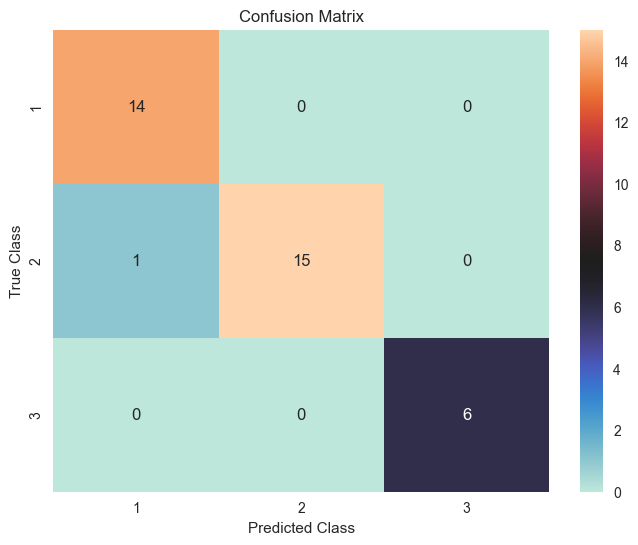

In [11]:
# TO DO: Print confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='icefire', fmt='g', xticklabels=y.unique(), yticklabels=y.unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

In [12]:
# TO DO: Print classification report

# Imports
from sklearn.metrics import classification_report

# Function call
report = classification_report(y_test, dtc_predictions)

# Print report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



## Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2?
1. In this case, is maximizing precision or recall more important? Why?

<font color='Green'><b>YOUR ANSWERS HERE</b></font>


1. The accuracy for Support Vector Classifier was generally much lower than the Decision Tree Classifier for both training and validation. DTC had a training accuracy of 0.97 compared to SVC's 0.70, and DTC's validation accuracy was 0.87 vs SVC's 0.66. About 0.2 difference for both accuracies.

2. The SVC parameters were left default, the lectures stated that the choice of kernel is very important when it comes to SVMs. Changing this to a different one might produce better results.

3. Only one sample was misclassified. It misclassified a class 2 instance.

4. In this case, I would choose recall as I want to show how well the DTC model did in predicting true positive instances, since the DTC model did so well at it.

## Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

<font color='Green'><b>DESCRIBE YOUR PROCESS HERE</b></font>
1. I refered to both the linear model and non-linear model lecture slides. I also refered to lab 4 assignment.

2. I followed the order of the notebook.

3. I asked ChatGPT on how to use the confusion_matrix() function and the SVC() function. I also asked it how to generate heatmaps using seaborn.

4. Not many issues in this part aside from generating the heatmap using seaborn, detailed explanation of its paramaters using generative AI helped quite a bit.

# **Part 3: Observations/Interpretation (3 marks)**

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.

<font color='Green'><b>
ADD YOUR FINDINGS HERE
</b></font>

In the lectures, specifically the non-linear model lectures, they stated that the main drawback with non-linear models is that they tend to overfit the training data. This is proven in part 1 as the non-linear model overfits it's training data. They also stated that its hyperparameters can change its performance greatly if tuned correctly.

Another observation I made is how important preprocessing is for SVMs. I noticed that the 'class' feature in the datasets documentation was labeled as categorical, if it wasnt then I would have had to use an encoder.

## **Part 4:** Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.

<font color='Green'><b>
ADD YOUR THOUGHTS HERE
</b></font>

I really liked how we compared the performance of non-linear models to linear models from the previous assignment, really makes it go full circle. Not much to dislike in this lab as it was a lot more straightforward compared to the previous one.

## **Part 5:** Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

SVC Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.80      0.75      0.77        16
           3       0.38      0.50      0.43         6

    accuracy                           0.78        36
   macro avg       0.72      0.73      0.72        36
weighted avg       0.81      0.78      0.79        36

Linear SVC Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94        16
           3       1.00      1.00      1.00         6

    accuracy                           0.94        36
   macro avg       0.96      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



c:\Users\Macante\Desktop\444Assignments\.venv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Macante\Desktop\444Assignments\.venv\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


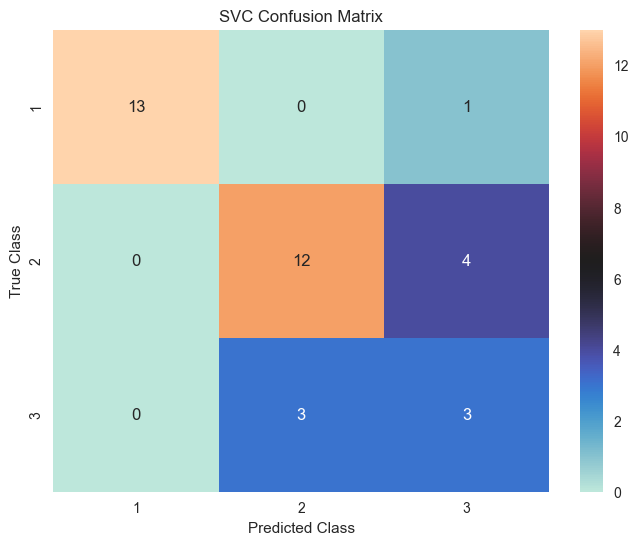

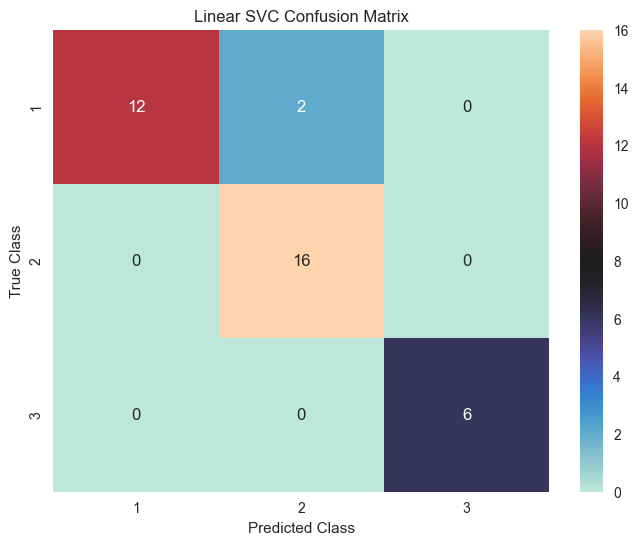

In [13]:
# TO DO: ADD YOUR CODE HERE
# imports
from sklearn.svm import LinearSVC

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Instantiate model
svc = SVC()
linear_svc = LinearSVC(max_iter=5000)

# Train the model
svc.fit(X_train, y_train)
linear_svc.fit(X_train, y_train)

# Predictions
svc_pred = svc.predict(X_test)
linear_svc_pred = linear_svc.predict(X_test)

# Classification reports
svc_report = classification_report(y_test, svc_pred)
linear_svc_report = classification_report(y_test, linear_svc_pred)

# Print report
print("SVC Classification Report:")
print(svc_report)

print("Linear SVC Classification Report:")
print(linear_svc_report)

# Confusion matrix
cm = confusion_matrix(y_test, svc_pred)
cm_linear = confusion_matrix(y_test, linear_svc_pred)

# SVC heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='icefire', fmt='g', xticklabels=y.unique(), yticklabels=y.unique())
plt.title('SVC Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# Linear SVC heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, cmap='icefire', fmt='g', xticklabels=y.unique(), yticklabels=y.unique())
plt.title('Linear SVC Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()




*ANSWER HERE*
1. The linear SVC does improve the results, just looking at the heatmap, the linear SVC made more correct predictions, but only for class 3, this may be because class 3 instances have some sort of linear relationship with its features so it could perform better.

2. While its not bad, it is not as good as Decision Tree Classifier. This may be because the dataset has non linear relationships between features so a non-linear model may perform better than a non linear one.